In [97]:
import numpy as np # linear algebra
import pandas as pd # data processing
import time
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import accuracy_score


## Read Data

In [98]:
data_name = "transformed_business_im"
# data_name = "dummy_object"
df = pd.read_csv(f"../../datasets/data_{data_name}.csv")
df_copy = df.copy()
df_copy.head()

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes,satisfaction
0,0,0,0,1,0,0,0,0,0,1,...,0,0,1,1,0,1,25,235,1,neutral or dissatisfied
1,0,0,1,0,0,0,0,0,1,0,...,1,1,0,1,0,1,26,1142,0,satisfied
2,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,25,562,11,neutral or dissatisfied
3,0,0,0,1,0,0,0,0,0,1,...,0,1,0,1,0,1,61,214,0,satisfied
4,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,1,52,2035,4,satisfied


<Axes: xlabel='satisfaction', ylabel='count'>

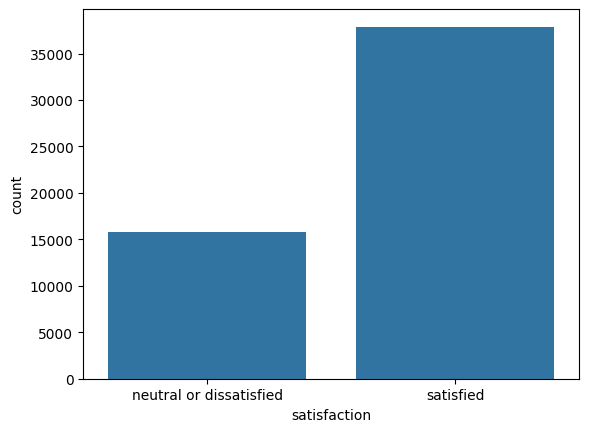

In [99]:
import seaborn as sns
sns.countplot(x="satisfaction", data=df_copy)

## Train-Test Splitting

In [100]:
X= df_copy.iloc[:,:-1]
X

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_4,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes
0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,1,0,1,25,235,1
1,0,0,1,0,0,0,0,0,1,0,...,0,1,1,0,1,0,1,26,1142,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,25,562,11
3,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,1,0,1,61,214,0
4,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,1,0,1,52,2035,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53714,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,1,0,1,39,404,0
53715,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,1,0,1,52,280,0
53716,0,0,0,1,0,0,0,0,0,1,...,1,0,0,1,1,0,1,34,526,0
53717,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,1,0,1,23,646,0


In [101]:
y = df_copy.iloc[:,-1]
y

0        neutral or dissatisfied
1                      satisfied
2        neutral or dissatisfied
3                      satisfied
4                      satisfied
                  ...           
53714    neutral or dissatisfied
53715                  satisfied
53716    neutral or dissatisfied
53717                  satisfied
53718                  satisfied
Name: satisfaction, Length: 53719, dtype: object

In [102]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print(f"Shape of training set is : {X_train.shape} and test set is :{X_test.shape}" )

Shape of training set is : (37603, 77) and test set is :(16116, 77)


In [103]:
from sklearn.preprocessing import MinMaxScaler
# ใช้ MinMaxScaler แปลง X_train ให้อยู่ในช่วง 0 ถึง 1
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

X_train

array([[0.        , 0.        , 0.        , ..., 0.56410256, 0.56159935,
        0.03333333],
       [0.        , 0.        , 1.        , ..., 0.29487179, 0.1331439 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.48717949, 0.09052162,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.75641026, 0.50781409,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.20512821, 0.50010148,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.34615385, 0.16480617,
        0.        ]])

## Set paramiter CV

In [104]:
# ทำ Cross Validation
k_folds = 15  # จำนวน k-folds 

## Naive-Bayes

In [105]:
from sklearn.naive_bayes import MultinomialNB

# ฟิตโมเดลด้วยข้อมูลที่ถูกแปลงแล้ว
model_naive = MultinomialNB()

start_time = time.time()  # เวลาเริ่มต้น
model_naive.fit(X_train, y_train)
end_time = time.time()  # เวลาสิ้นสุด

# คำนวณเวลาที่ใช้ในการฝึกโมเดล
training_time_NB = end_time - start_time
print(f"เวลาที่ใช้ในการฝึกโมเดล: {training_time_NB:.6f} วินาที")

เวลาที่ใช้ในการฝึกโมเดล: 0.081809 วินาที


In [106]:

#Predict the accuracy of the model
y_pred_naive=model_naive.predict(X_test)

accuracy_NB=accuracy_score(y_pred_naive,y_test)
print(f"Accuracy of Naive Bayes is : {round(accuracy_NB*100,2)} % .")

report=classification_report(y_test,y_pred_naive)
print("Classification Report is : \n",report)

Accuracy of Naive Bayes is : 86.57 % .
Classification Report is : 
                          precision    recall  f1-score   support

neutral or dissatisfied       0.75      0.81      0.78      4742
              satisfied       0.92      0.89      0.90     11374

               accuracy                           0.87     16116
              macro avg       0.84      0.85      0.84     16116
           weighted avg       0.87      0.87      0.87     16116



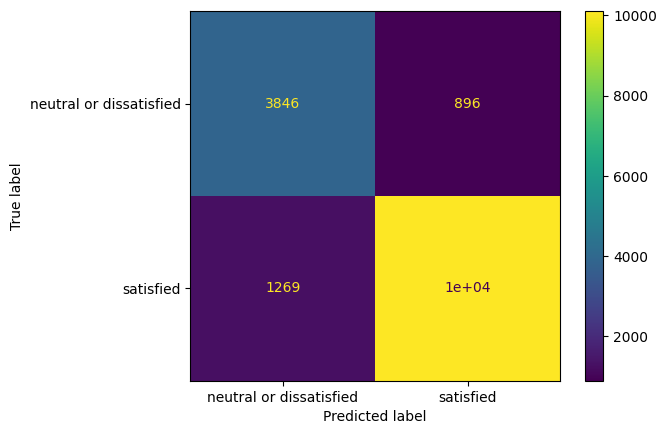

In [107]:
cm_2= confusion_matrix(y_test, y_pred_naive, labels=model_naive.classes_)
disp_2= ConfusionMatrixDisplay(confusion_matrix=cm_2,
                          display_labels=model_naive.classes_)
disp_2.plot()

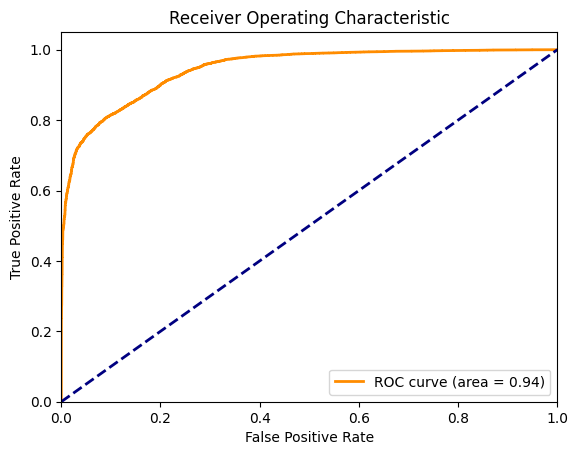

In [108]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# แปลง y_test เป็นค่าตัวเลข
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)

# ทำนายโอกาสของแต่ละ class
y_prob = model_naive.predict_proba(X_test)[:, 1]

# คำนวณ ROC curve
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_prob)
roc_auc = auc(fpr, tpr)

# แสดงกราฟ ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [109]:
# ทำ Cross Validation
start_time_cv = time.time()  # เวลาเริ่มต้นสำหรับ cross-validation
cv_scores_nb = cross_val_score(model_naive, X_train, y_train, cv=k_folds, scoring='accuracy')
end_time_cv = time.time()  # เวลาสิ้นสุดสำหรับ cross-validation

# แสดงผล Cross Validation Scores
print(f"Cross Validation Scores (NB): {cv_scores_nb}")
print(f"Mean CV Accuracy: {np.mean(cv_scores_nb):.4f}")
print(f"Standard Deviation CV Accuracy: {np.std(cv_scores_nb):.4f}")

# คำนวณเวลาที่ใช้ในการทำ Cross Validation
cv_time_NB = end_time_cv - start_time_cv
print(f"เวลาที่ใช้ในการทำ Cross Validation: {cv_time_NB:.6f} วินาที")


Cross Validation Scores (NB): [0.86318309 0.86677304 0.8747507  0.86796968 0.87076187 0.87435181
 0.86358197 0.86477862 0.8723574  0.87554846 0.87275628 0.87873953
 0.87275628 0.8707103  0.86632083]
Mean CV Accuracy: 0.8704
Standard Deviation CV Accuracy: 0.0046
เวลาที่ใช้ในการทำ Cross Validation: 1.112037 วินาที


In [110]:
# การประเมินผล
train_accuracy = accuracy_score(y_train, model_naive.predict(X_train))
test_accuracy = accuracy_score(y_test, model_naive.predict(X_test))

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Training Accuracy: 0.8706486184612929
Test Accuracy: 0.8656614544551998


## Save Model Predic

In [111]:
import pickle
pickle_out = open("../../pipelines/model_NB_business.pkl", mode = "wb")
pickle.dump(model_naive, pickle_out)
pickle_out.close()

with open('../../pipelines/scaler_NB.pkl', 'wb') as f:
    pickle.dump(scaler, f)

## Load Model Predic

In [112]:
import pickle
df_t = pd.read_csv(f"../../datasets/data_{data_name}.csv")
df_sam = df_t.sample(20)
df_sam

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes,satisfaction
40420,0,1,0,0,0,0,1,0,0,0,...,0,1,0,1,0,1,27,2773,7,neutral or dissatisfied
31739,0,1,0,0,0,0,0,1,0,0,...,1,1,0,1,0,1,44,395,0,satisfied
12864,0,0,0,1,0,0,0,0,0,1,...,0,1,0,1,0,1,28,526,0,satisfied
39372,0,0,0,1,0,0,0,0,0,1,...,1,1,0,1,0,1,58,1744,7,satisfied
29749,0,0,0,0,1,0,0,0,0,0,...,1,1,0,1,0,1,45,1732,0,satisfied
7994,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,1,1,8,529,9,neutral or dissatisfied
49197,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,48,312,0,satisfied
38414,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,40,712,0,satisfied
12180,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,1,44,2965,0,satisfied
47135,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,53,808,5,satisfied


In [113]:

X_sam= df_sam.iloc[:,:-1]
X_sam


,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_4,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes
40420,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,1,27,2773,7
31739,0,1,0,0,0,0,0,1,0,0,...,0,1,1,0,1,0,1,44,395,0
12864,0,0,0,1,0,0,0,0,0,1,...,1,0,1,0,1,0,1,28,526,0
39372,0,0,0,1,0,0,0,0,0,1,...,0,1,1,0,1,0,1,58,1744,7
29749,0,0,0,0,1,0,0,0,0,0,...,0,1,1,0,1,0,1,45,1732,0
7994,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,1,1,8,529,9
49197,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,1,0,1,48,312,0
38414,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,1,0,1,40,712,0
12180,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,1,44,2965,0
47135,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,1,0,1,53,808,5


In [114]:
y_sam = df_sam.iloc[:,-1]
y_sam


40420    neutral or dissatisfied
31739                  satisfied
12864                  satisfied
39372                  satisfied
29749                  satisfied
7994     neutral or dissatisfied
49197                  satisfied
38414                  satisfied
12180                  satisfied
47135                  satisfied
5758     neutral or dissatisfied
25268                  satisfied
14786                  satisfied
42941    neutral or dissatisfied
19337    neutral or dissatisfied
14410    neutral or dissatisfied
10990                  satisfied
9995                   satisfied
49857                  satisfied
44754                  satisfied
Name: satisfaction, dtype: object

In [115]:
model = pickle.load(open("../../pipelines/model_NB_business.pkl", 'rb'))
scaler_NB = pickle.load(open("../../pipelines/scaler_NB.pkl", 'rb'))

scaler_new = scaler_NB.transform(X_sam)
preds = model.predict(scaler_new)
print(preds)
accuracy_NB=accuracy_score(preds,y_sam)
print(f"Accuracy of NB is : {round(accuracy_NB*100,2)} % .")

['neutral or dissatisfied' 'satisfied' 'satisfied' 'satisfied' 'satisfied'
 'neutral or dissatisfied' 'satisfied' 'satisfied' 'satisfied' 'satisfied'
 'neutral or dissatisfied' 'satisfied' 'satisfied'
 'neutral or dissatisfied' 'neutral or dissatisfied'
 'neutral or dissatisfied' 'satisfied' 'satisfied' 'satisfied' 'satisfied']
Accuracy of NB is : 100.0 % .
